# Лабораторная работа №1: "Разведочный анализ данных. Исследование и визуализация данных"

## 1) Текстовое описание набора данных
Датасет `fortune500.csv` содержит информацию о прибыли крупнейших компаний США.

#### Параметры датасета:
* _Year_ - год, за который была посчитана прибыль
* _Rank_ - место, занимаемое компанией по прибыли
* _Company_ - название компании
* _Revenue_ - годовой доход
* _Profit_ - средняя прибыль за год

## Импорт бибилиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Загрузка данных

In [2]:
df = pd.read_csv('fortune500.csv')

## 2) Основные характеристики датасета

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


Переименуем столбцы для удобства обращения.

In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Размер датасета

In [6]:
df.shape

(25500, 5)

Список колонок с типами данных.

In [7]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Столбец `profit` имеет тип данных, отличный от ожидаемого (ожидался тип данных `float64`). Найдем строки, содержащие отличные символы.

In [8]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Определим, какие значения принимают строки, помимо `N.A.` и их количество.

In [9]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [10]:
len(df.profit[non_numberic_profits])

369

Узнаем, равномерно ли распределены эти строки между годами и как сильно повлияет их удаление на статистику.

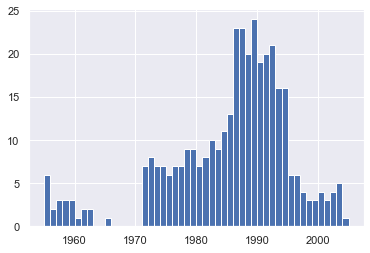

In [11]:
bin_sizes = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

Удалим строки с `N.A.` и перепроверим типы столбцов.

In [12]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [13]:
len(df)

25131

In [14]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Еще раз проверим наличие пустых значений в столбцах.

In [15]:
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

year - 0
rank - 0
company - 0
revenue - 0
profit - 0


In [16]:
df.describe()

,year,rank,revenue,profit
count,25131.000000,25131.000000,25131.000000,25131.000000
mean,1979.926784,249.744777,4304.961780,207.903677
std,14.764827,144.443000,11396.723687,1173.695947
min,1955.000000,1.000000,49.700000,-98696.000000
25%,1967.000000,124.000000,357.900000,8.900000
50%,1980.000000,250.000000,1017.600000,35.500000
75%,1993.000000,375.000000,3916.100000,150.500000
max,2005.000000,500.000000,288189.000000,25330.000000


## 3) Визуальное исследование датасета

Построим график средней прибыли за год.

In [17]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')

avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

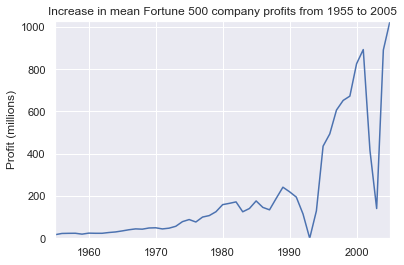

In [18]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

График средней прибыли компании похож на экспоненту с огромными провалами. Самый сильный провал наблюдается в середине 90-х и 00-х. Это связано с крупными историческими событиями, подорвавшими экономику западного мира. Однако каждый раз прибыль возвращается на более высокий уровень, чем было до провала.

Рассмотрим график доходов.

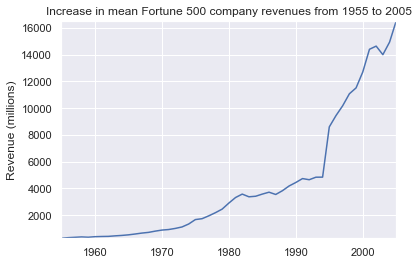

In [19]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

Доходы почти не имеют провалов - по сравнения с графиком прибыли они очень незначительные.

Если рассмотреть отклонения прибыли и доходов за тот же период, можно заметить, что пока общая тенденция прибыли и доходов показывает нам среднее значение по рынку, существует множество компаний, которые зарабатывают миилиарды во время рецессии, но также существуют и те компании, которые теряют кратно больше денег, чем все остальные.

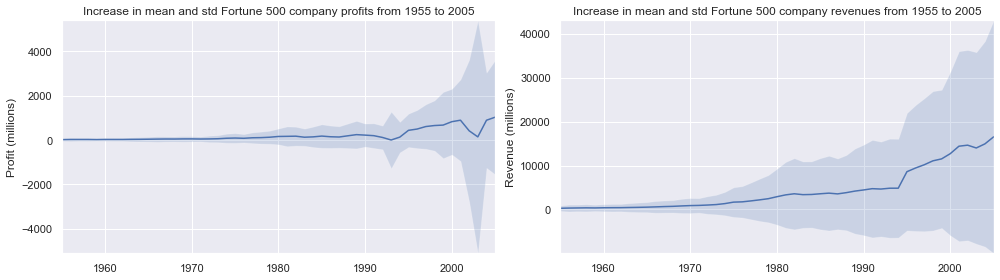

In [20]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values

plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')

fig.set_size_inches(14, 4)
fig.tight_layout()

## 4) Информация о корреляции признаков

В качестве целевого признака будем использовать признак `Revenue` (количественная непрерывная переменная).

In [21]:
df.corr()

,year,rank,revenue,profit
year,1.000000,-0.002677,0.365016,0.169832
rank,-0.002677,1.000000,-0.362945,-0.184791
revenue,0.365016,-0.362945,1.000000,0.477046
profit,0.169832,-0.184791,0.477046,1.000000


Больше всего целевой признак коррелирует с `Profit` и отчасти с признаком `Year`.

<AxesSubplot:>

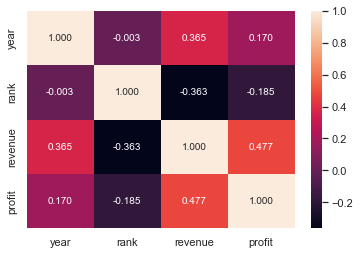

In [22]:
sns.heatmap(df.corr(), annot=True, fmt='.3f')